In [ ]:
# necessarily this version
!pip install timm==0.6.13 --quiet

In [14]:
import torch
import networkx as nx
import numpy as np
from PIL import Image
from torchvision import transforms
import numpy as np
import cv2
from matplotlib import pyplot as plt

from attention_flow import VITAttentionFlow

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.39287106 0.12768253 0.23821098 0.12734363 0.01072049
  0.         0.         0.         0.22600709 0.22776694 0.57770266
  0.30123179 0.07419929]
 [0.         0.60222637 0.23542069 0.29129483 0.1959641  0.21523056
  0.36539739 0.59007065 0.11879074 0.0667642  0.68341978 0.19093677
  0.16908057 0.28136746]
 [0.12603701 0.40869009 0.27819723 0.36840992 0.29937092 1.
  0.77537149 0.50431642 0.38668492 0.66741538 0.28292394 0.25875092
  0.45191668 0.        ]
 [0.0749525  0.34784848 0.2093637  0.40034202 0.4117472  0.86298856
  0.89015619 0.38858098 0.54435493 0.66023155 0.11779856 0.28070936
  0.54343366 0.49208195]
 [0.         0.3141002  0.24431445 0.46594676 0.72332509 0.47606096
  0.93467058 0.76244672 0.68746828 0.59480019 0.38162011 0.73752793
  0.78452715 0.56103805]
 [0.         0.         0.00333818 0.17516542 0.50914894 0.52018041
  0.48520782 0.68034496 0.3057815

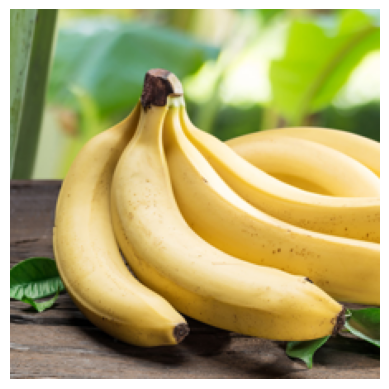

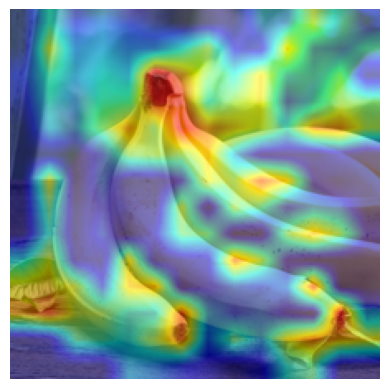

True

In [15]:
def show_mask_on_image(img, mask):
    img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

def show_image(image):
    """display an image using OpenCV and Matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (Matplotlib uses RGB)
    plt.imshow(image)
    plt.axis('off') 
    plt.show()

use_cuda = False
image_path = "test_images/banane.png"
head_fusion = "mean" # or "min" or "max"

model = torch.hub.load('facebookresearch/deit:main',
    'deit_tiny_patch16_224', pretrained=True)
model.eval()

if use_cuda:
    model = model.cuda()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

img = Image.open(image_path)
img = img.resize((224, 224)).convert('RGB')
input_tensor = transform(img).unsqueeze(0)
if use_cuda:
    input_tensor = input_tensor.cuda()

print("Doing Attention Flow")
attention_flow = VITAttentionFlow(model, head_fusion=head_fusion)
mask = attention_flow(input_tensor)
name = "attention_flow_{}.png".format(head_fusion)

np_img = np.array(img)[:, :, ::-1]
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask)

show_image(np_img)
show_image(mask)
cv2.imwrite("input.png", np_img)
cv2.imwrite(name, mask)
